# 3. DATA EXPLORATION

In [2]:
import pandas as pd
import numpy as np

accidents_df = pd.read_csv("/Users/jeesh/Desktop/2ndSem/DataWrangling(Proj)/accidents_cleaned.csv") #change as needed
accidents_df.head()

,ID,Start_Time,End_Time,State,City,Start_Lat,Start_Lng,Temperature(F),Weather_Condition,Hour
0,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,OH,Dayton,39.865147,-84.058723,36.9,Light Rain,5.0
1,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,OH,Reynoldsburg,39.928059,-82.831184,37.9,Light Rain,6.0
2,A-3,2016-02-08 06:49:27,2016-02-08 07:19:27,OH,Williamsburg,39.063148,-84.032608,36.0,Overcast,6.0
3,A-4,2016-02-08 07:23:34,2016-02-08 07:53:34,OH,Dayton,39.747753,-84.205582,35.1,Mostly Cloudy,7.0
4,A-5,2016-02-08 07:39:07,2016-02-08 08:09:07,OH,Dayton,39.627781,-84.188354,36.0,Mostly Cloudy,7.0


# 3.1 Distribution of Accidents by Hour

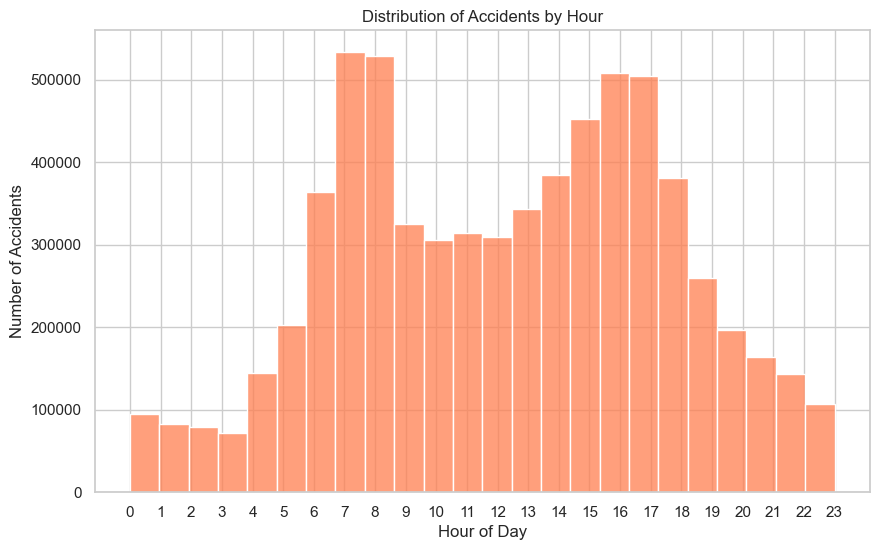

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

# Ensure Hour column exists
if 'Hour' not in accidents_df.columns:
    accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour

plt.figure(figsize=(10,6))
sns.histplot(accidents_df['Hour'], bins=24, kde=False, color='coral')
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# 3.2 Top 10 States with Most Accidents

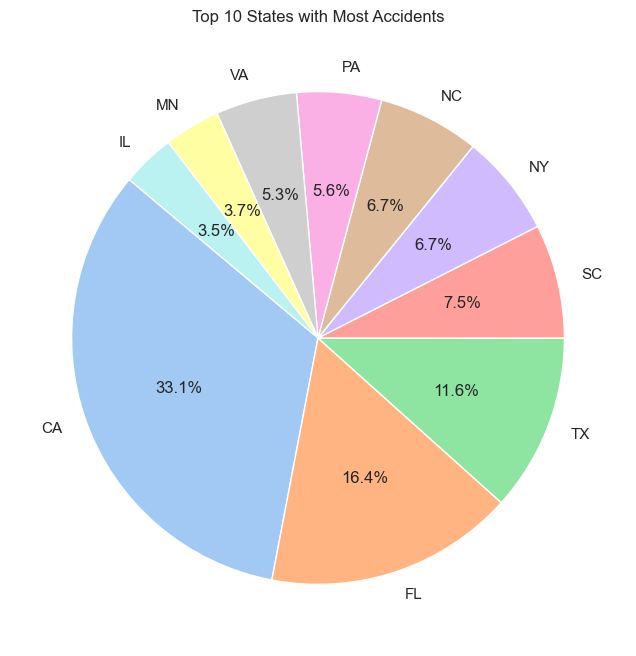

In [10]:
top_states = accidents_df['State'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_states.values, labels=top_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 States with Most Accidents')
plt.show()

# 3. Top 10 Cities with Most Accidents

C:\Users\jeesh\AppData\Local\Temp\ipykernel_17332\3331938128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette="Blues_d")


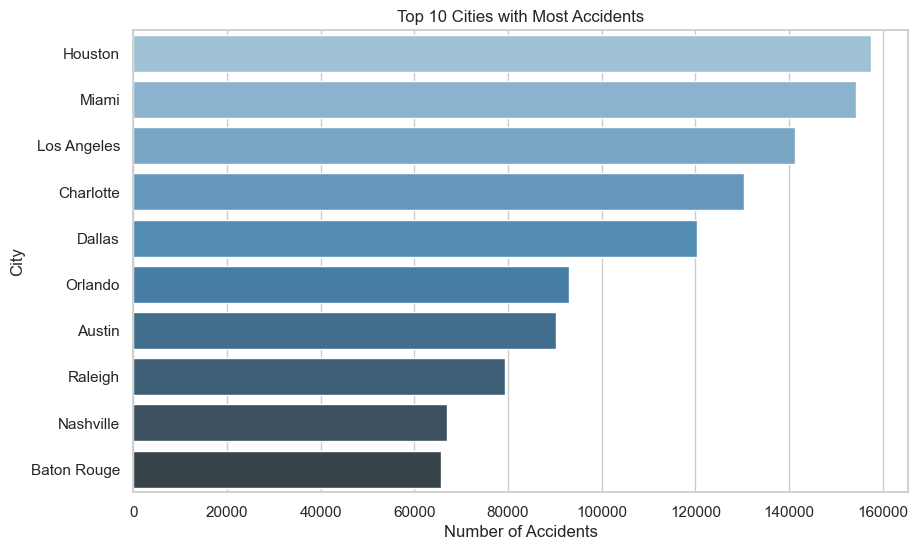

In [12]:
top_cities = accidents_df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="Blues_d")
plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()

# 4. Top 10 Weather Conditions during Accidents 

C:\Users\jeesh\AppData\Local\Temp\ipykernel_17332\1489753945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather', y='Counts', data=weather_df, palette='cubehelix')


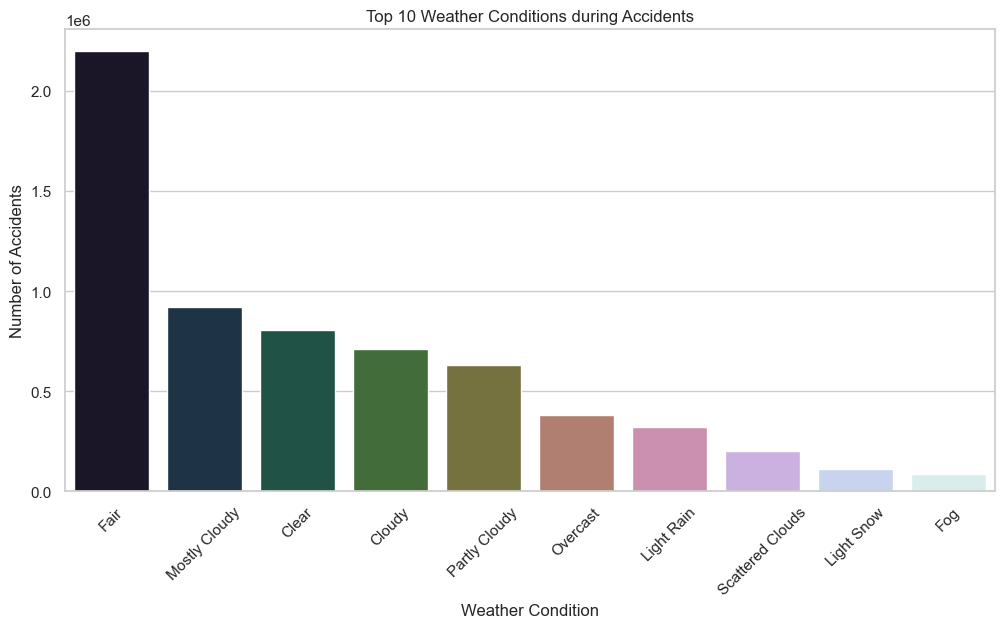

In [18]:
top_weather = accidents_df['Weather_Condition'].value_counts().head(10)
weather_df = top_weather.reset_index()
weather_df.columns = ['Weather', 'Counts']

plt.figure(figsize=(12,6))
sns.barplot(x='Weather', y='Counts', data=weather_df, palette='cubehelix')
plt.title('Top 10 Weather Conditions during Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 5. Temperature Distribution during Accidents 

C:\Users\jeesh\AppData\Local\Temp\ipykernel_17332\3257185058.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Weekend', y='Temperature(F)', data=accidents_df, palette="coolwarm")


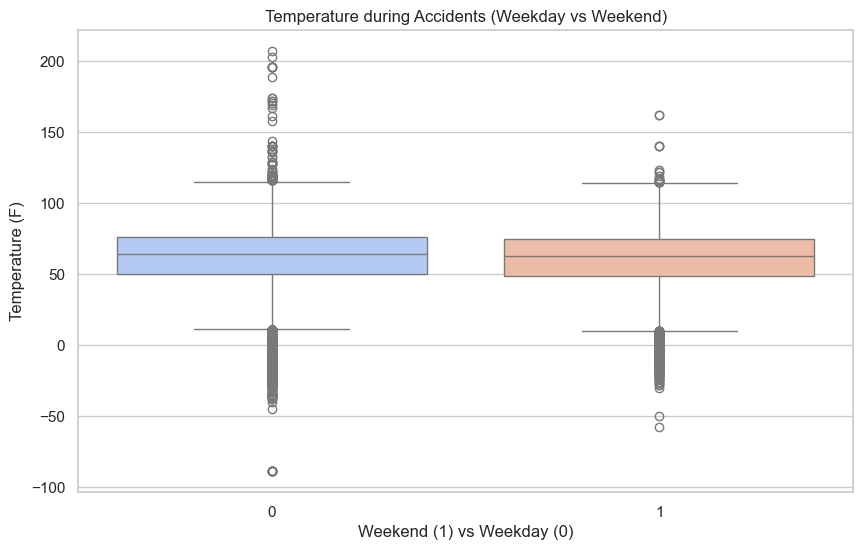

In [23]:
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')

# Ensure Is_Weekend column exists
if 'Is_Weekend' not in accidents_df.columns:
    accidents_df['Weekday'] = accidents_df['Start_Time'].dt.weekday
    accidents_df['Is_Weekend'] = accidents_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

plt.figure(figsize=(10,6))
sns.boxplot(x='Is_Weekend', y='Temperature(F)', data=accidents_df, palette="coolwarm")
plt.title('Temperature during Accidents (Weekday vs Weekend)')
plt.xlabel('Weekend (1) vs Weekday (0)')
plt.ylabel('Temperature (F)')
plt.show()